In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

%matplotlib inline

import statsmodels.api as sm

In [3]:
fire = pd.read_csv('AFD_CY16 - SOC Fire Data Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire.dropna(inplace=True)
fire.index = pd.to_datetime(fire.index)

fire.head()

,Master Incident Number,CalendarYear,Cancellation Status,General Dispatched Problem,Calltaker Agency (AFD or EMS),Order of AFD Arrival,Response Area (COA Only),First Arriving Unit Name,Response Status,PriorityDescription,EMS Time Phone Pickup,Earliest Time Phone Pickup,First Unit Assigned,Did not Reduce to Code 1,Onscene Time Was Correct,Latitude,Longitude,First Unit Enroute,First Unit Arrived
AFD Time Phone Pickup,,,,,,,,,,,,,,,,,,,
2016-11-01 22:16:34,1,2016,Not Cancelled,Medical,EMS,1st or Only AFD,00-2304,ENG16,Code 3,4M,-,-,11/01/2016 22:16:53,No,Yes/Left Blank,30339176,97699349,11/01/2016 22:17:26,11/01/2016 22:22:56
2016-01-01 00:03:20,16000002,2016,Not Cancelled,Medical,EMS,1st or Only AFD,00-0803,ENG30,Code 3,4M,1/1/16 0:02,01/01/2016 00:02:45,01/01/2016 00:03:41,No,Yes/Left Blank,30359676,97710378,01/01/2016 00:03:45,01/01/2016 00:06:32
2016-01-01 00:11:05,16000007,2016,Not Cancelled,Medical,EMS,1st or Only AFD,00-2402,ENG24,Code 3,1M,1/1/16 0:09,01/01/2016 00:09:57,01/01/2016 00:11:06,No,Yes/Left Blank,30196979,97735657,01/01/2016 00:12:25,01/01/2016 00:14:50
2016-01-01 00:11:19,16000008,2016,Not Cancelled,Medical,EMS,1st or Only AFD,00-0102,ENG13,Code 3,1M,1/1/16 0:10,01/01/2016 00:10:37,01/01/2016 00:11:20,No,Yes/Left Blank,30265602,97745157,01/01/2016 00:12:08,01/01/2016 00:16:34
2016-01-01 00:35:53,16000013,2016,Not Cancelled,Medical,EMS,1st or Only AFD,00-2304,ENG23,Code 3,1M,1/1/16 0:34,01/01/2016 00:34:26,01/01/2016 00:35:54,No,Yes/Left Blank,30357900,97687501,01/01/2016 00:36:53,01/01/2016 00:38:47


In [4]:
fire['Response Area (COA Only)'].value_counts()

00-0101    1913
00-0102    1277
00-2202     836
00-0701     771
00-1801     693
00-1804     687
00-1802     679
00-2402     659
00-0501     645
00-1803     599
00-2403     585
00-2301     578
00-3001     572
00-2204     534
00-2304     525
00-3502     522
00-2801     502
00-2903     491
00-4001     489
00-1504     486
00-3604     475
00-1101     468
00-2005     466
00-2803     456
00-1403     450
00-2501     448
00-0601     434
00-0702     429
00-0804     414
00-0201     410
           ... 
00-0070       9
00-4306       8
00-3209       8
00-4610       8
00-2611       8
00-3207       7
00-4212       7
00-3108       7
00-4405       6
00-4601       6
00-4603       6
00-3905       5
00-3110       5
00-0060       5
00-4604       4
00-4507       4
00-0103       4
00-3206       3
00-3903       3
00-3208       3
00-0080       2
00-1711       2
00-3702       1
00-0090       1
00-3704       1
00-4206       1
00-4106       1
00-4208       1
00-1906       1
00-1004       1
Name: Response Area (COA

In [40]:
#Rename the column
fire_2016_month_df.columns = ['Count']
fire_2016_month_df.head()

,Count
AFD Time Phone Pickup,
2016-01-31,3699
2016-02-29,3761
2016-03-31,3978
2016-04-30,4066
2016-05-31,4042


# Seasonality Volume Data

Want to see the Seasonality of the data, and establish a time series analysis on the monthly count of Emergencies.

### 2012 Group By Data

In [3]:
fire_2012 = pd.read_csv('AFD_CY12 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2012.dropna(inplace=True)
fire_2012.index = pd.to_datetime(fire_2012.index)

fire_2012_month_df = fire_2012.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

In [4]:
#Rename the column
fire_2012_month_df.columns = ['Count']
fire_2012_month_df.head()

,Count
AFD Time Phone Pickup,
2012-01-31,4095
2012-02-29,3932
2012-03-31,4450
2012-04-30,4355
2012-05-31,4558


### 2013 Group By Data

In [5]:
fire_2013 = pd.read_csv('AFD_CY13 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2013.dropna(inplace=True)
fire_2013.index = pd.to_datetime(fire_2013.index)

fire_2013_month_df = fire_2013.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

#Rename the column
fire_2013_month_df.columns = ['Count']
fire_2013_month_df.head()

,Count
AFD Time Phone Pickup,
2013-01-31,4401
2013-02-28,3993
2013-03-31,4500
2013-04-30,4325
2013-05-31,4672


### 2014 Group By Data

In [6]:
fire_2014 = pd.read_csv('AFD_CY14 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2014.dropna(inplace=True)
fire_2014.index = pd.to_datetime(fire_2014.index)

fire_2014_month_df = fire_2014.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

#Rename the column
fire_2014_month_df.columns = ['Count']
fire_2014_month_df.head()

,Count
AFD Time Phone Pickup,
2014-01-31,4596
2014-02-28,4065
2014-03-31,4615
2014-04-30,4615
2014-05-31,4777


### 2015 Group By Data

In [7]:
fire_2015 = pd.read_csv('AFD_CY15 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2015.dropna(inplace=True)
fire_2015.index = pd.to_datetime(fire_2015.index)

fire_2015_month_df = fire_2015.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

#Rename the column
fire_2015_month_df.columns = ['Count']
fire_2015_month_df.head()

,Count
AFD Time Phone Pickup,
2015-01-31,4556
2015-02-28,4228
2015-03-31,4922
2015-04-30,4811
2015-05-31,4598


### 2016 Group By Data

In [8]:
fire_2016 = pd.read_csv('AFD_CY16 - SOC Fire Data Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2016.dropna(inplace=True)
fire_2016.index = pd.to_datetime(fire_2016.index)

fire_2016_month_df = fire_2016.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

#Rename the column
fire_2016_month_df.columns = ['Count']
fire_2016_month_df.head()

,Count
AFD Time Phone Pickup,
2016-01-31,3699
2016-02-29,3761
2016-03-31,3978
2016-04-30,4066
2016-05-31,4042


### 2017 Group By Data

In [9]:
fire_2017 = pd.read_csv('AFD_CY17 - SOC Filtered Data_Generalized.csv', index_col='AFD Time Phone Pickup')
fire_2017.dropna(inplace=True)
fire_2017.index = pd.to_datetime(fire_2017.index)

fire_2017_month_df = fire_2017.groupby(pd.TimeGrouper("M")).count()['Master Incident Number'].to_frame()

#Rename the column
fire_2017_month_df.columns = ['Count']
#Drop the last column
fire_2017_month_df.drop(fire_2017_month_df.index[-1], inplace=True)

fire_2017_month_df.head()

,Count
AFD Time Phone Pickup,
2017-01-31,4040
2017-02-28,3784
2017-03-31,4639
2017-04-30,4415
2017-05-31,4241


In [10]:
fire_2017_month_df.tail()

,Count
AFD Time Phone Pickup,
2017-06-30,4028
2017-07-31,3991
2017-08-31,4341
2017-09-30,4296
2017-10-31,4322


In [11]:
#To Concat the final frames
final_df = pd.concat([fire_2012_month_df, fire_2013_month_df, fire_2014_month_df, fire_2015_month_df, fire_2016_month_df, fire_2017_month_df])

In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 2012-01-31 to 2017-10-31
Data columns (total 6 columns):
Count                70 non-null int64
12 Month SMA         59 non-null float64
6 Month SMA          65 non-null float64
EWMA12               70 non-null float64
EWMA6                70 non-null float64
12 Month Variance    59 non-null float64
dtypes: float64(5), int64(1)
memory usage: 3.8 KB


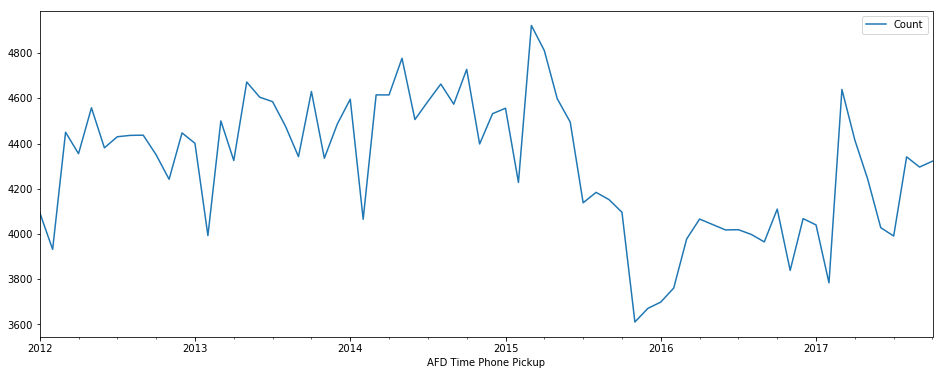

In [12]:
final_df.plot(figsize=(16,6))

In [13]:
#SMA
final_df['12 Month SMA'] = final_df['Count'].rolling(12).mean()
final_df['6 Month SMA'] = final_df['Count'].rolling(6).mean()
final_df['EWMA12'] = final_df['Count'].ewm(span=12).mean()
final_df['EWMA6'] = final_df['Count'].ewm(span=6).mean()
#Variance
final_df['12 Month Variance'] = final_df['Count'].rolling(12).std()

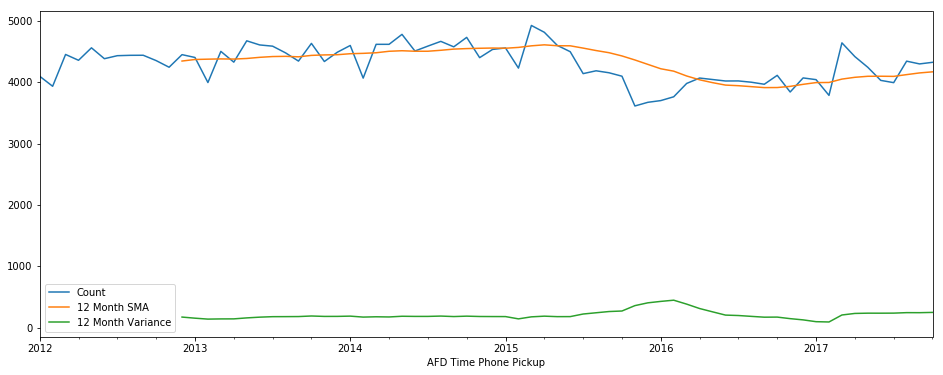

In [14]:
final_df[['Count', '12 Month SMA', '12 Month Variance']].plot(figsize=(16,6))

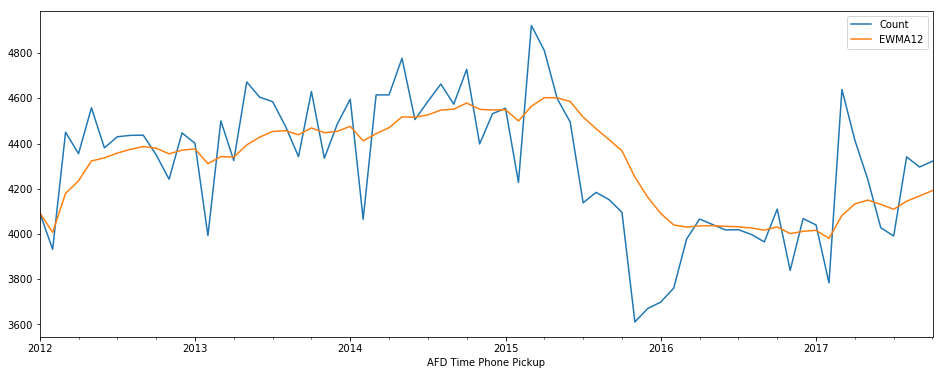

In [15]:
#EWMA
final_df[['Count', 'EWMA12']].plot(figsize=(16,6))

### What happened in 2015? Why was there such a huge drop???

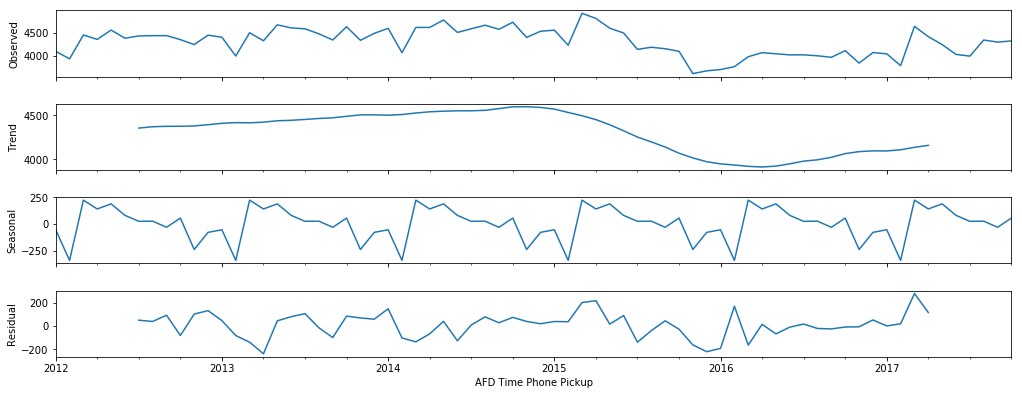

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(final_df['Count'])
fig = result.plot()
fig.set_size_inches(16,6)

Lets Test Stationarity. To prepare this for teh ARIMA model

In [17]:
from statsmodels.tsa.stattools import adfuller

#Function to test the dataset

def adf_check(time_series):
    result = adfuller(time_series)
    print("Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Obversations used']
    for value,label in zip(result, labels):
        print(label + " : " + str(value))
        
    if result[1]< 0.05:
        print("Strong evidence to reject the null")
        print("Data is stationary")
    else:
        print("Cannot Reject the null")
        print("Data is not stationary")



In [18]:
adf_check(final_df['Count'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.63860244879
p-value : 0.0852784556706
# of lags : 1
Num of Obversations used : 68
Cannot Reject the null
Data is not stationary


This supports the suspcicion that the data is not stationary, because it has seasonality to it.

#### ARIMA

In [33]:
model = sm.tsa.statespace.SARIMAX(final_df['Count'], order=(1,1,1), seasonal_order=(2,1,1,12))

model_result = model.fit()

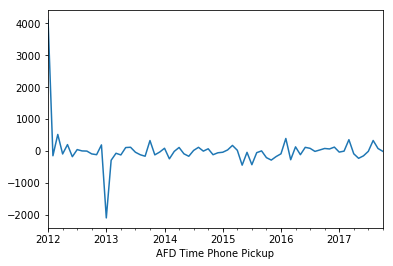

In [34]:
model_result.resid.plot()

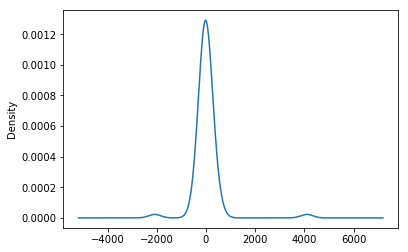

In [32]:
model_result.resid.plot(kind='kde')

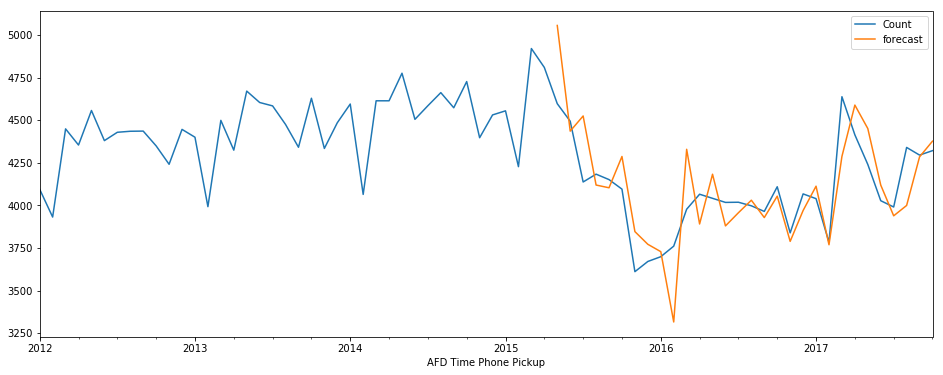

In [22]:
final_df['forecast'] = model_result.predict(start=40, end=70)
final_df[['Count', 'forecast']].plot(figsize=(16,6))

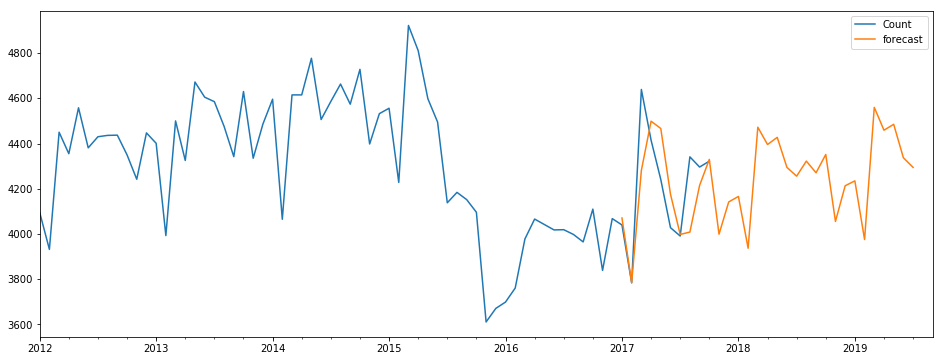

In [38]:
#Need to add points to the end of the dataset to forecast out
from pandas.tseries.offsets import DateOffset

future_dates = [final_df.index[-1] + DateOffset(months=x) for x in range(1,24)]
future_df = pd.DataFrame(index=future_dates, columns=final_df.columns)

future_final_df = pd.concat([final_df,future_df])
#Since have 24 more points
future_final_df['forecast'] = model_result.predict(start=60, end=90)
future_final_df[['Count', 'forecast']].plot(figsize=(16,6))